先画出 $$ \frac{1}{1+3x^2} $$ 的图像

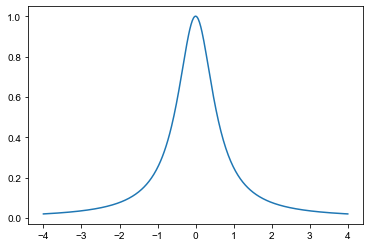

In [22]:
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(-4,4,500)
funx=1/(1+3*x**2)
plt.plot(x,funx)

In [23]:
#牛顿插值法
x=np.linspace(-4,4,9)
y=[]
for i in x:
    y.append(1/(1+3*i**2))
y=np.array(y)
if(len(y)!=len(x)):print('error')

In [24]:
#计算差商
n=len(y)
cssheet=np.zeros((n,n+1))
cssheet[:,0]=x
cssheet[:,1]=y
k=1
while(k!=n):
    for i in range(k,n):
        cssheet[i][k+1]=(cssheet[i][k]-cssheet[i-1][k])/(x[i]-x[i-k])
    k = k+1
    
cssheet

array([[-4.00000000e+00,  2.04081633e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-3.00000000e+00,  3.57142857e-02,  1.53061224e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-2.00000000e+00,  7.69230769e-02,  4.12087912e-02,
         1.29513344e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-1.00000000e+00,  2.50000000e-01,  1.73076923e-01,
         6.59340659e-02,  1.76609105e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  7.50000000e-01,
         2.88461538e-01,  7.41758242e-02,  1.41287284e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.

In [25]:
#计算newton插值
x_i=np.linspace(-4.0,4.0,81)
p=len(x_i)
y_i=np.zeros((1,p))
y_i[0][0]=y[0]
cfwh=0
for i in range(p):
    w=1  
    cfwh=0
    for j in range(n-1):
        w=w*(x_i[i]-x[j])
        cfwh=cfwh+cssheet[j+1][j+2]*w  
    y_i[0][i]=cfwh+y_i[0][0]
y_i=np.array(y_i[0])
y_i

array([ 0.02040816, -0.846777  , -1.29885272, -1.45278628, -1.40285383,
       -1.22373744, -0.97333359, -0.69528961, -0.42128448, -0.17306973,
        0.03571429,  0.19793177,  0.31154016,  0.37836012,  0.40301334,
        0.39201511,  0.35300902,  0.29413181,  0.22349648,  0.1487826 ,
        0.07692308,  0.0138769 , -0.03552174, -0.06764754, -0.08011018,
       -0.07173097, -0.04247799,  0.00663262,  0.07366222,  0.15589547,
        0.25      ,  0.35219447,  0.45841961,  0.56450744,  0.66634439,
        0.76002433,  0.84198823,  0.90914728,  0.95898708,  0.98965086,
        1.        ,  0.98965086,  0.95898708,  0.90914728,  0.84198823,
        0.76002433,  0.66634439,  0.56450744,  0.45841961,  0.35219447,
        0.25      ,  0.15589547,  0.07366222,  0.00663262, -0.04247799,
       -0.07173097, -0.08011018, -0.06764754, -0.03552174,  0.0138769 ,
        0.07692308,  0.1487826 ,  0.22349648,  0.29413181,  0.35300902,
        0.39201511,  0.40301334,  0.37836012,  0.31154016,  0.19

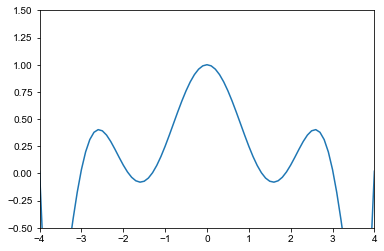

In [26]:
plt.axis([-4,4,-0.5,1.5])
plt.plot(x_i,y_i)

In [27]:
#拉格朗日
def lagrange(x, y, num_point, x_test):
    lx = np.zeros(shape=(num_point,))
    for k in range(num_point):
        lx[k] = 1
        for k2 in range(num_point):
            if k != k2:
                lx[k] = lx[k] * (x_test - x[k2]) / (x[k] - x[k2])
            else:
                pass
    res = 0
    for i in range(num_point):
        res += y[i] * lx[i]
    return res

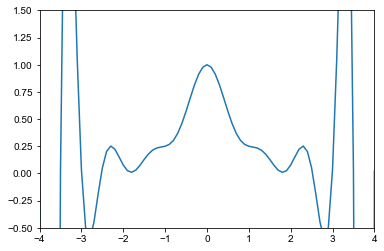

In [28]:
x1=np.linspace(-4,4,17)
y1=[]
for i in x1:
    y1.append(1/(1+3*i**2))
y1=np.array(y1)
x_test = list(np.linspace(-4, 4, 81))
y_predict = [lagrange(x1, y1, 17, x_i) for x_i in x_test]
plt.axis([-4,4,-0.5,1.5])
plt.plot(x_test,y_predict)

In [29]:
#分段3次 Hermite
x2=np.linspace(-4,4,9)
n=len(x2)
y2=[]
for i in x2:
    y2.append(1/(1+3*i**2))
y2=np.array(y2)
if(len(y2)!=len(x2)):print('error')
x_i=np.linspace(-4.0,4.0,81)
m=len(x_i)
y_i=np.zeros(shape=(m,))
from sympy import *
xx = symbols("x")  # 符号x，自变量 
y=1/(1+xx**2*3)
dify = diff(y,xx) #求导 
ydot=[]
for i in x2:
    ydot.append(dify.subs('x',i))

In [30]:
for i in range(m):
    for k in range(n-1):
        if x2[k]<=x_i[i] and x2[k+1]>=x_i[i]:
            yi=y2[k]*((1-2*(x_i[i]-x2[k])/(x2[k]-x2[k+1])))*((x_i[i]-x2[k+1])**2/(x2[k]-x2[k+1])**2)\
            +y2[k+1]*((1-2*(x_i[i]-x2[k+1])/(x2[k+1]-x2[k])))*((x_i[i]-x2[k])**2/(x2[k+1]-x2[k])**2)\
            +ydot[k]*(x_i[i]-x2[k])*((x_i[i]-x2[k+1])**2/(x2[k]-x2[k+1])**2)\
            +ydot[k+1]*(x_i[i]-x2[k+1])*((x_i[i]-x2[k])**2/(x2[k+1]-x2[k])**2)
        y_i[i]=yi
                                                 

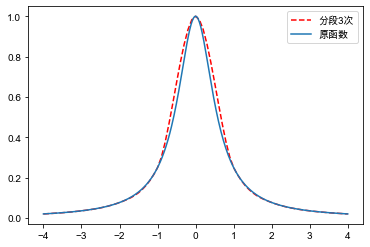

In [31]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] #显示中文
%matplotlib inline
plt.plot(x_i,y_i,linestyle='--',color='r',label='分段3次')
x=np.linspace(-4,4,500)
funx=1/(1+3*x**2)
plt.plot(x,funx,label='原函数')
plt.legend()